In [57]:
import collections

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from powerlaw import *

# Part 0

In [389]:
# parse the "blog.txt" into graph
file = open("blog.txt")
G = nx.DiGraph()
while True:
    line = file.readline()
    if not line:
        break
    x = line.split()
    G.add_edge(x[0], x[1])
file.close()

DiGraph with 1224 nodes and 19025 edges


# Part 1

## out-degree distribution

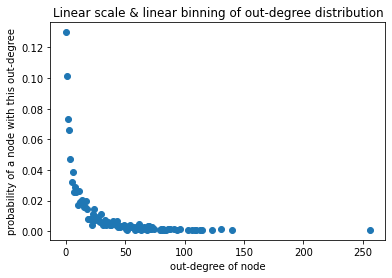

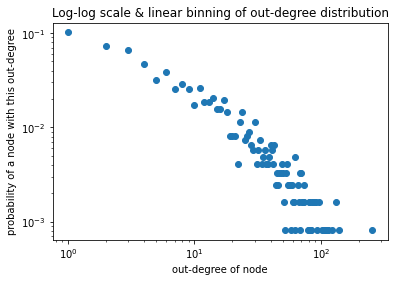

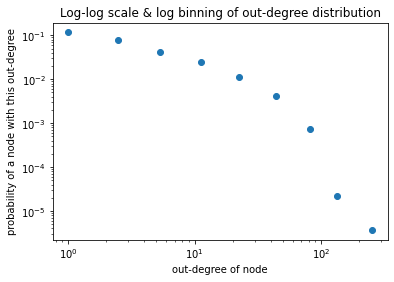

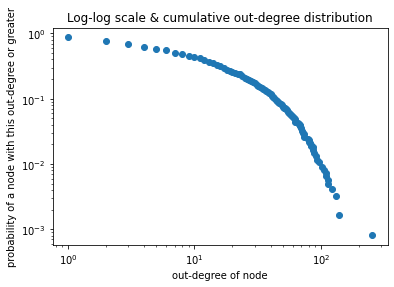

In [407]:
# Plot the out-degree distribution
out_d = [d for n,d in G.out_degree(G.nodes())]
out_d.sort()

p_k = []
k = []
count = 0
old_d = out_d[0]
k.append(out_d[0])

for d in out_d:
    if old_d == d:
        count += 1
    else:
        p_k.append(count/len(out_d))
        k.append(d)
        count = 1 
        old_d = d

p_k.append(count/len(out_d))

plt.xlabel("out-degree of node")
plt.ylabel("probability of a node with this out-degree")
plt.title("Linear scale & linear binning of out-degree distribution")
plt.scatter(k,p_k)
plt.show()

p_k.pop(0)
k.pop(0)

plt.xlabel("out-degree of node")
plt.ylabel("probability of a node with this out-degree")
plt.title("Log-log scale & linear binning of out-degree distribution")
plt.scatter(k,p_k)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

b = 1 
bin_size = 1 
factor = 2 
plog_bin = []
t_kn = []
kn = []
n = 0
t_pk = 0

o_d = [x for x in out_d if x > 0]
for i,x in enumerate(o_d):
    if x <= b:
        t_kn.append(x)
        t_pk += 1 
    else:
        plog_bin.append(len(t_kn)/(bin_size*len(o_d))) 
        kn.append(sum(t_kn)/len(t_kn))
        t_kn.clear()
        t_kn.append(x)
        t_pk = 1 
        bin_size = bin_size * factor
        b = b + bin_size
        
plog_bin.append(len(t_kn)/(bin_size*len(o_d))) 
kn.append(sum(t_kn)/len(t_kn))

plt.xlabel("out-degree of node")
plt.ylabel("probability of a node with this out-degree")
plt.title("Log-log scale & log binning of out-degree distribution")
plt.scatter(kn,plog_bin)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

C_pk = []
for i in range(len(p_k)):
    C_pk.append(sum(p_k[i:]))

plt.xlabel("out-degree of node")
plt.ylabel("probability of a node with this out-degree or greater")
plt.title("Log-log scale & cumulative out-degree distribution")
plt.scatter(k,C_pk)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

### fitting without xmax


In [185]:
#fit the out-degree distributon without xmax
fit = powerlaw.Fit(k, discrete = True)
print("Exponent of power-law degree distribution:", fit.alpha)
print("Minimum x-value for power-law fit:", fit.xmin)

Exponent of power-law degree distribution: 5.907036590931355
Minimum x-value for power-law fit: 103.0


Calculating best minimal value for power law fit


### fitting wit xmax

In [186]:
#fit the out-degree distributon with xmax = 200
fit = powerlaw.Fit(k, discrete = True, xmax = 200)
print("Exponent of power-law degree distribution:", fit.alpha)
print("Minimum x-value for power-law fit:", fit.xmin)

Calculating best minimal value for power law fit


Exponent of power-law degree distribution: 2.3216241272924742
Minimum x-value for power-law fit: 42.0


## in-degree distribution

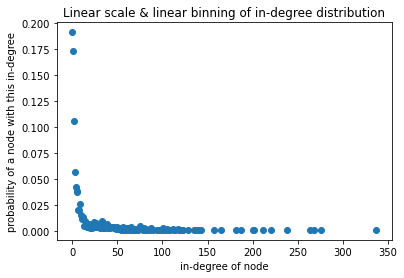

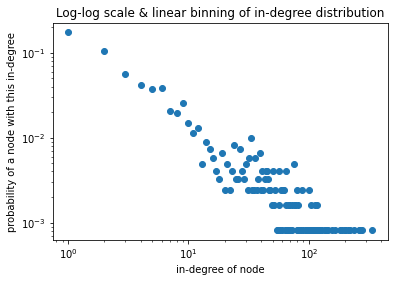

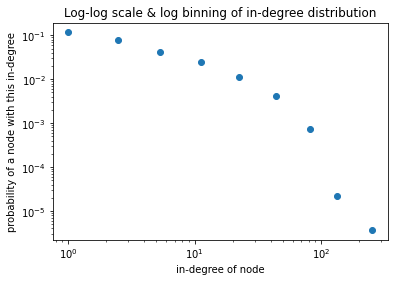

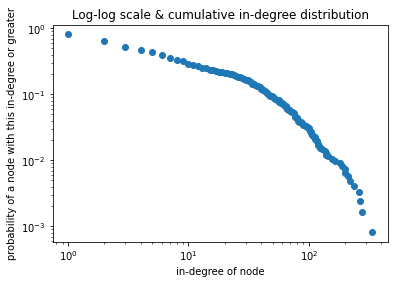

In [410]:
# Plot the out-degree distribution
in_d = [d for n,d in G.in_degree(G.nodes())]
in_d.sort()

p_k = []
k = []
count = 0
old_d = in_d[0]
k.append(in_d[0])

for d in in_d:
    if old_d == d:
        count += 1
    else:
        p_k.append(count/len(in_d))
        k.append(d)
        count = 1 
        old_d = d

p_k.append(count/len(in_d))

plt.xlabel("in-degree of node")
plt.ylabel("probability of a node with this in-degree")
plt.title("Linear scale & linear binning of in-degree distribution")
plt.scatter(k,p_k)
plt.show()

p_k.pop(0)
k.pop(0)

plt.xlabel("in-degree of node")
plt.ylabel("probability of a node with this in-degree")
plt.title("Log-log scale & linear binning of in-degree distribution")
plt.scatter(k,p_k)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

b = 1 
bin_size = 1 
factor = 2 
plog_bin = []
t_kn = []
kn = []
n = 0
t_pk = 0

o_d = [x for x in out_d if x > 0]
for i,x in enumerate(o_d):
    if x <= b:
        t_kn.append(x)
        t_pk += 1 
    else:
        plog_bin.append(len(t_kn)/(bin_size*len(o_d))) 
        kn.append(sum(t_kn)/len(t_kn))
        t_kn.clear()
        t_kn.append(x)
        t_pk = 1 
        bin_size = bin_size * factor
        b = b + bin_size
        
plog_bin.append(len(t_kn)/(bin_size*len(o_d))) 
kn.append(sum(t_kn)/len(t_kn))
    
plt.xlabel("in-degree of node")
plt.ylabel("probability of a node with this in-degree")
plt.title("Log-log scale & log binning of in-degree distribution")
plt.scatter(kn,plog_bin)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

C_pk = []
for i in range(len(p_k)):
    C_pk.append(sum(p_k[i:]))

plt.xlabel("in-degree of node")
plt.ylabel("probability of a node with this in-degree or greater")
plt.title("Log-log scale & cumulative in-degree distribution")
plt.scatter(k,C_pk)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

### fitting without xmax

In [188]:
# Fit the in-degree distributon without xmax
fit = powerlaw.Fit(k, discrete = True)
print("Exponent of power-law degree distribution:", fit.alpha)
print("Minimum x-value for power-law fit:", fit.xmin)

Exponent of power-law degree distribution: 3.3198351498737098
Minimum x-value for power-law fit: 94.0


Calculating best minimal value for power law fit


### fitting with xmax

In [189]:
# Fit the in-degree distributon with xmax = 300
fit = powerlaw.Fit(k, discrete = True, xmax = 300)
print("Exponent of power-law degree distribution:", fit.alpha)
print("Minimum x-value for power-law fit:", fit.xmin)

Calculating best minimal value for power law fit


Exponent of power-law degree distribution: 1.9475560671062895
Minimum x-value for power-law fit: 54.0


# Part 2

## Q1

In [375]:
# Compute the Pearson correlation coefficieient
import math
from scipy.stats import t
H = G.to_undirected()
r = nx.degree_pearson_correlation_coefficient(H)
print("Pearson correlation coefficient: ", r)
t_val = r * math.sqrt(n - 2) / math.sqrt(1 - r**2)
p = 2*t.cdf(x = t_val,df =  n - 2)
print("The test is significant at the following significant level: ", p)

Pearson correlation coefficient:  -0.22117675119889957
The test is significant at the following significant level:  2.434695912583859e-184


Based on the result, do you think this network is assortative, disassortative or neutral? write 1-2 sentence(s) to state your conclusion and reasons.

The pearson correlation coefficient gave us the value of `r` about equal to -0.22118 which is less than 0 and hence suggests to us that the network is disassortative. We check if this pearson correlation coefficient value is a significant via t-test with the null hypothesis that `r = 0` against the alternative of `r != 0` and find that this is very significant with `p` about equal to 2.44*(10^-184) (e.g. we can take `alpha = 0.000001` for example). 

## Q2


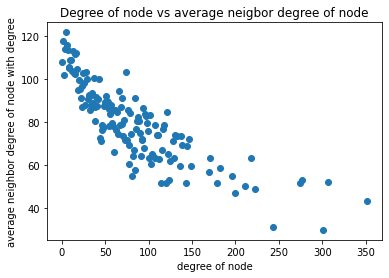

The pearson correlation coefficient between the two variables in the plot is:  -0.8319287959674054
The test is significant at the following significant level:  3.8031936416751434e-38
Therefore since r < 0 and this value is significant at a reasonable significance level, we have that this is disassortative


In [469]:
# Plot the average neighbor degree as a function of the node degree k
an_k = nx.average_neighbor_degree(H)
k = {} 

for n in an_k:
    g = H.degree(n)
    if g in k:
        d, i = k[g]
        k[g] = ((d*i + an_k[n])/(i+1), i+1)
    else:
        k[g] = (an_k[n], 1)
        
l_k = []
a_k = []

for n in k:
    l_k.append(n)
    a_k.append(k[n][0])


plt.xlabel("degree of node")
plt.ylabel("average neighbor degree of node with degree")
plt.title("Degree of node vs average neigbor degree of node")
plt.scatter(l_k,a_k)
plt.show()

r = np.corrcoef(l_k, a_k)
r = r[0][1]
print("The pearson correlation coefficient between the two variables in the plot is: ", r)
n = len(l_k)
t_val = r * math.sqrt(n - 2) / math.sqrt(1 - r**2)
p = 2*t.cdf(x = t_val,df =  n - 2)
print("The test is significant at the following significant level: ", p)
print("Therefore since r < 0 and this value is significant at a reasonable significance level, we have that this is disassortative")
#for n in an_k:
#    if H.degree(n) == 87:
#       print(n, an_k[n])
#print(k) 

# Part 3

## Q1

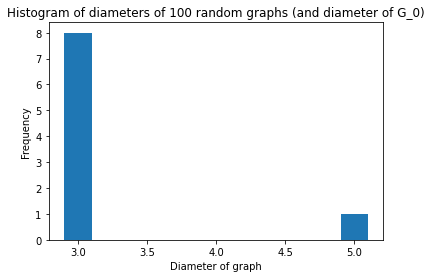

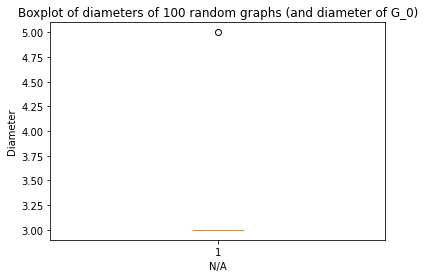

NOTE THAT we also plot a histogram here because the boxplot looks somewhat strange.
* G_0 is the largest strongly connnected component in G where G is the graph formed from data in blog.txt.


In [525]:
# Plot the diameters of the LCC and the 100 G(n,p) networks
max_comp = set() 

G_0 = nx.Graph()
S = nx.strongly_connected_components(G)
for comp in S:
    if len(comp) > len(max_comp):
        max_comp = comp
        
for edge in G.edges():
    if edge[0] in max_comp and edge[1] in max_comp:
        G_0.add_edge(edge[0], edge[1])
        
n = len(G_0.nodes())
m = len(G_0.edges())
p = m/(n*(n-1)/2)

dG_r = [nx.diameter(G_0)]
for i in range(100):
    G_r = nx.fast_gnp_random_graph(n,p)
    dG_r.append(nx.diameter(G_r))

plt.xlabel("Diameter of graph")
plt.ylabel("Frequency")
plt.title("Histogram of diameters of 100 random graphs (and diameter of G_0)")
l, c = np.unique(dG_r, return_counts=True)
plt.bar(l,c, align="center", width=0.2)
plt.show()

plt.xlabel("N/A")
plt.ylabel("Diameter")
plt.title("Boxplot of diameters of 100 random graphs (and diameter of G_0)")
plt.boxplot(dG_r)
plt.show()

print("NOTE THAT we also plot a histogram here because the boxplot looks somewhat strange.")
print("* G_0 is the largest strongly connnected component in G where G is the graph formed from data in blog.txt.")

## Q2

Note the following: 
* G_0 is the largest strongly connnected component in G where G is the graph formed from data in blog.txt.


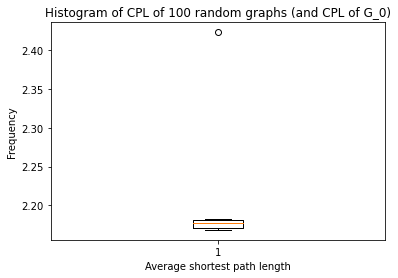

In [534]:
# Plot the average shortest path length of the LCC and the 100 G(n,p) networks
n = len(G_0.nodes())
m = len(G_0.edges())
p = m/(n*(n-1)/2)

aG_r = [nx.average_shortest_path_length(G_0)]
for i in range(100):
    G_r = nx.fast_gnp_random_graph(n,p)
    aG_r.append(nx.average_shortest_path_length(G_r))

plt.xlabel("Average shortest path length")
plt.ylabel("Frequency")
plt.title("Histogram of CPL of 100 random graphs (and CPL of G_0)")
plt.boxplot(aG_r)
print("Note the following: ")
print("* G_0 is the largest strongly connnected component in G where G is the graph formed from data in blog.txt.")

## Q3

In [535]:
import statistics as s 
import math as m
# we add an additional value to the data set to prevent 0 variance
# This gives us an upper bounded estimate (it would lead to worser case than 0 variance meaning 
# that by doing so it would make it less likely to reject the null hypothesis)
t_val_d = None
if np.isclose(s.stdev(dG_r[1:]),0):
    t_val_d =  (dG_r[0] - s.mean(dG_r[1:])) / (s.stdev(dG_r[1:] + [s.mean(dG_r[1:]) + 1]) / m.sqrt(len(dG_r[1:])))
else:
    t_val_d = (dG_r[0] - s.mean(dG_r[1:])) / (s.stdev(dG_r[1:]) / m.sqrt(len(dG_r[1:])))
    
t_val_a = (aG_r[0] - s.mean(aG_r[1:])) / (s.stdev(aG_r[1:]) / m.sqrt(len(aG_r[1:])))

# we substract by 1 since the observed value is at the right tail of the distribution
# and multiply by two since we are testing for difference from the mean (not whether it is greater or less than it)
p_d = 2*(1 - t.cdf(x = t_val_d,df =  len(dG_r[1:]) - 1))
p_a = 2*(1 - t.cdf(x = t_val_a,df =  len(aG_r[1:]) - 1))

print("The test for difference in diameter is significant at the following level: ", p_d)
print("The test for difference in average shortest path length is significant at the following level: ", p_a)

The test for difference in diameter is significant at the following level:  6.045694300738091e-07
The test for diffeernce in average shortest path length is significant at the following level:  9.740412187930758e-08


Use the one-sample t-test to examine if the diameter of the undirected network is significantly different than the diameter of the random networks at a 95% significance level? What about the average shortest path length?

* The p-values for both tests are printed above. 
* The test for difference in diameter has a p-value less than 0.05.
* The test for difference in average shortest path length has a p-value less than 0.05. 
* Since these are both less than 0.05, we have that both test is significant at the 95% significance level
* Therefore the diameter of the undirected network is significantly different from what would be expected from a random network with the same number of expected edges.
* Therefore the avarege shortest path length of the undirected network is significantly different from what would be expected from a random network with the same number of expected edges.

NOTE: we added an additional value to the diameter data set to prevent 0 variance.
This gives us an upper bounded estimate. In other words, by doing so it would make it less likely to reject the null hypothesis so the p-value estimate is still valid for 95% significance.


# Part 4

## Q1

In [69]:
# Plot the clustering coefficient of the LCC and a G(n,p) network in CCDF format

Are the two distributions significantly different?

## Q2

In [70]:
# Plot the average clustering coefficient as a function of the node degree

What do you observe based on the above visualization?

## Q3

In [71]:
# Plot the transitivity coefficient of the overall network of the LCC and the 100 G(n,p) networks

## Q4

Combining the results of Part-3 and Part-4, can we conclude that the undirected LCC of Part-1 network is a small-world network or not? Please provide with your reasons.

# Part 5

Which of the previous triplet types are statistically more common (or less common) in the network of the LCC compared to what we would expense based on chance?

# Part 6

Note that the Transitivity and the Average Clustering Coefficient are two different metrics. They may often be close but there are also some extreme cases in which the two metrics give very different answers. To see that consider a network in which two nodes A and B are connected to each other as well as to every other node. There are no other links. The total number of nodes is n. What would be the transitivity and average clustering coefficient in this case (you can simplify by assuming that n is quite large)?